In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

columns_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv',names=columns_names,delim_whitespace=True,)

dataSelected = data.loc[:, ['RM', 'LSTAT']]
dataOutput = data.loc[:, ['MEDV']]

In [48]:
def normalize(data, mins, maxs):
    rng = maxs - mins
    norm_X = 1 - ((maxs - data)/rng)
    return norm_X

for column in dataSelected.columns:
    mins = np.min(dataSelected)[column]
    maxs = np.max(dataSelected)[column]
    data = dataSelected.loc[:, column]
    dataSelected.loc[:, column] = normalize(data, mins, maxs)
print(dataSelected)

dataOutput = normalize(dataOutput, np.min(dataOutput), np.max(dataOutput))
print(dataOutput)

           RM     LSTAT
0    0.577505  0.089680
1    0.547998  0.204470
2    0.694386  0.063466
3    0.658555  0.033389
4    0.687105  0.099338
..        ...       ...
501  0.580954  0.219095
502  0.490324  0.202815
503  0.654340  0.107892
504  0.619467  0.131071
505  0.473079  0.169702

[506 rows x 2 columns]
         MEDV
0    0.422222
1    0.368889
2    0.660000
3    0.631111
4    0.693333
..        ...
501  0.386667
502  0.346667
503  0.420000
504  0.377778
505  0.153333

[506 rows x 1 columns]


In [49]:
def hypothesis(x, theta):
    """
      x is training set
      theta is weight parameter
      """
    return np.transpose(np.array(theta)).dot(np.array(x))

def costFunction(theta, x, y):
    """
        x is training set
        y is a vector of
        theta is weight parameter
        """
    factor = 1 / 2 * len(x)
    sum = 0
    for i in range(0, len(x)):
        sum += math.pow((hypothesis(x[i], theta) - y[i]), 2)
    return factor * sum

def learnThetaSingle(theta, x, y, alpha):
    return theta + alpha * (y - hypothesis(x, theta)) * x

def learnTheta(theta, x, y, alpha):
    f = theta
    for i in range(0, len(x)):
        f = learnThetaSingle(f, x[i], y[i], alpha)
    return f


In [45]:
testX = np.array(dataSelected)
testY = np.array(dataOutput)

initial_theta = [5, -0.5]
cost = costFunction(initial_theta, testX, testY)
print(cost)
theta = learnTheta(initial_theta, testX, testY, 0.0005)
cost = costFunction(theta, testX, testY)

print(theta)
print(cost)

61193610.91909622
[7.71391019 0.63997835]
52386811.48345688


RM


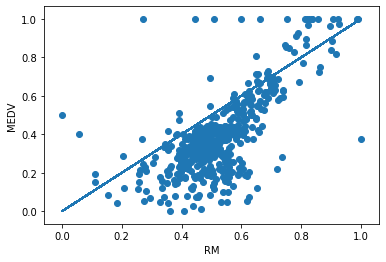

LSTAT


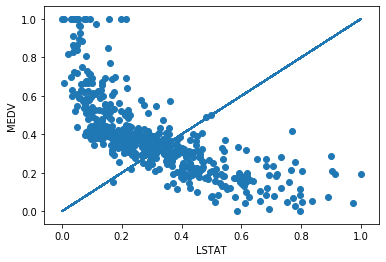

In [53]:
y_pred = theta*testX
y_pred = normalize(y_pred, np.min(y_pred), np.max(y_pred))

for column in dataSelected.columns:
    print(column)
    plt.scatter(x=dataSelected.loc[:, column], y=dataOutput)
    plt.xlabel(column)
    plt.ylabel(dataOutput.columns[0])
    plt.plot(testX[:, 0], y_pred[:, 0], antialiased=False)
    plt.show()
